The notebook will be an implementation of the finite difference of the (1D) wave equation on a rectangular domain

The 1D wave equation is a linear partial differential equation (PDE) of the form 
$$
    \frac{\partial^2 u}{\partial t^2} = D^2\frac{\partial^2 u}{\partial x^2}
$$
where $t$ is the time and $x$ is the direction.

To specify a unique solution $u(x,t)$ on the domain $[a,b] \times [0, \infty)$, one would need to provide an inital condition on both the solution, its time partial derivatives along and its boundary condition on the sides of the rectangle. That is, one would need
$$
    \begin{equation}
        \begin{cases}
            u(x,0) = f(x) \qquad \hspace{14pt} \text{ for } a \leq x \leq b \\
            \displaystyle \frac{\partial u}{\partial t}(x,0) = \frac{df}{dt}(x) \quad \hspace{8pt} \text{ for } a \leq x \leq b \\
            u(a,t) = l(t) \qquad \qquad \text{ for } t \geq 0 \\
            u(b,t) = r(t) \qquad \qquad \text{ for } t \geq 0
        \end{cases}
    \end{equation}
$$

To discretize it, we will first take a portion of time interval $[t_0, t] \subseteq [0,\infty)$ and work with the rectangle $[a,b] \times [t_0,t]$. Choose the step-size $h$ for the space and $k$ then to make the solution stable, these would need to sastisfy the <b> CFL-condition </b>
$$
    \alpha = \frac{Dk}{h} \leq 1
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy import integrate

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib widget


# Initial conditions
def f(x):
    return 0*x
def f_t(x):
    return 2*np.pi*np.sin(np.pi*x)
def l(t):
    return 0*t
def r(t):
    return 0*t

# Wave speed
D = 2 

In [2]:
def waveFD(f, f_t, l, r, D, x_0, x_end, t_0, t_end, space_steps, time_steps):
    h = (x_end - x_0)/space_steps
    k = (t_end - t_0)/time_steps
    alpha = (D*k)/h

    # Checking for stability
    if alpha < 0 or alpha > 1:
        print("Fail to meet the CFL-condition for stability")
        return None, None, None
    
    m = space_steps - 1
    n = time_steps

    # Generating bounds for grid
    x = np.linspace(x_0 + h, x_end - h, m)  # Spatial bounds
    t = np.linspace(t_0, t_end, n+1)        # Time bounds

    # Finite difference matrix
    A = np.diag((2-2*(alpha**2))*np.ones(m)) + np.diag((alpha**2)*np.ones(m-1),k=1) + np.diag((alpha**2)*np.ones(m-1),k=-1)

    # Initialize solution matrix
    W = np.zeros((n+1, m+2))    # +2 to include boundary points
    
    # Apply initial conditions
    W[0, 1:-1] = f(x)
    W[1, 1:-1] = W[0, 1:-1] + k * f_t(x)

    # Time stepping
    for j in range(1, n):
        # Interior points
        W[j+1, 1:-1] = A @ W[j, 1:-1] - W[j-1, 1:-1]
    
    # Return solution
    return x, t, W

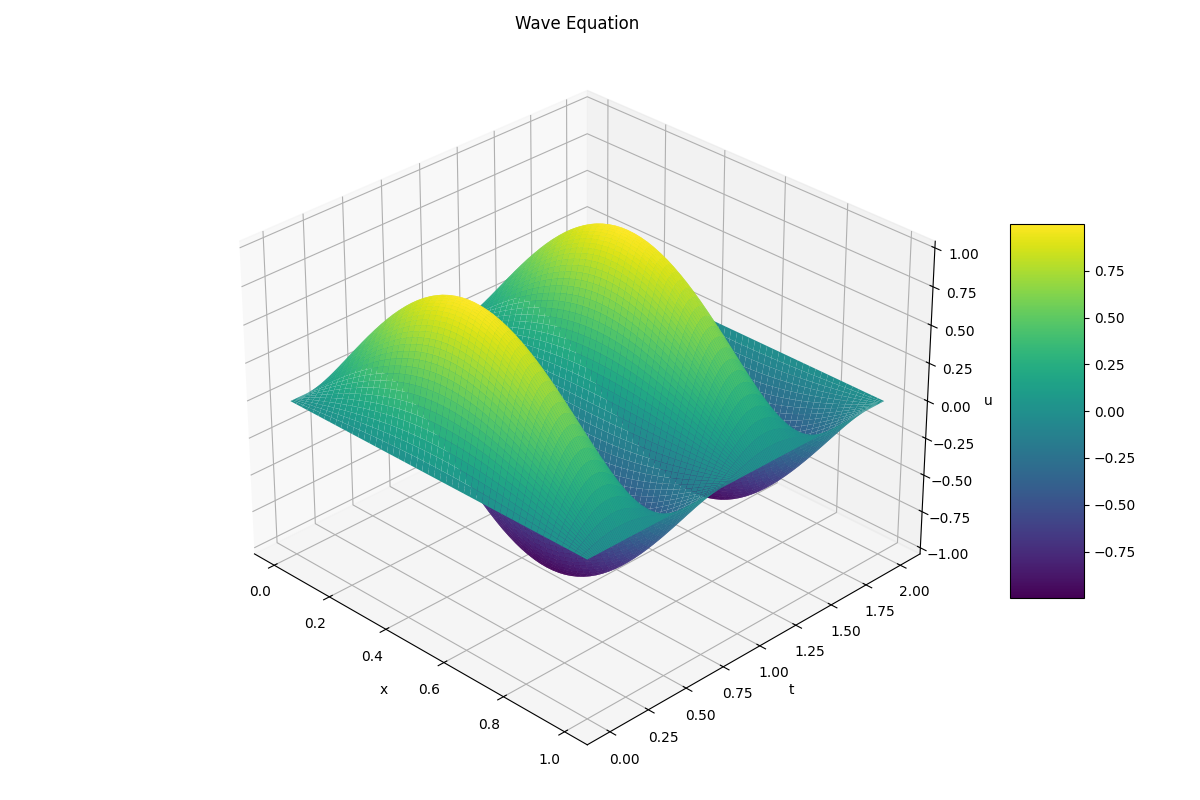

In [3]:
# Run the Finite Difference
x, t, W = waveFD(f, f_t, l, r, D, x_0=0, x_end=1, t_0=0, t_end=2, space_steps=50, time_steps=200)

# Plot
if W is not None:
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create grid for plotting
    X, T = np.meshgrid(np.linspace(0, 1, W.shape[1]), t)
    
    # Plot the surface
    surf = ax.plot_surface(X, T, W, 
                        cmap=cm.viridis,
                        linewidth=0, antialiased=True, rstride=1, cstride=1)
    
    # Customize the initial view angle
    ax.view_init(30, -45)
    
    # Add labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    ax.set_title('Wave Equation')
    
    # Add a color bar
    fig.colorbar(surf, aspect=5, shrink=0.5)
    
    plt.tight_layout()
    plt.show()